# TP de Aprendizagem de Máquina
### Aluno: Geanderson Esteves dos Santos

Trabalho Prático 1
- Redes Neuronais + Backpropagation

Neste trabalho você irá implementar uma rede neuronal com três camadas:

1. Camada de entrada: cada unidade representa uma dimensão do dado de entrada.

2. Camada oculta: cada unidade representa uma transformação a partir das unidades de entrada.

3. Camada de saída: cada unidade representa a chance da saída correspondente ser a correta.

Você irá utilizar a função Sigmóide para obter não-linearidade. Além disso, a função de perda a ser minimizada é a seguinte:

onde m é a quantidade de entradas no treino, K é o número de saídas possíveis,  representa a saída correta de cada classe k em cada entrada (i), e similarmente representa a saída dada pela rede neuronal.

O dado a ser utilizado está anexado. Trata-se de 5000 entradas, onde cada entrada refere-se a um dígito escrito manualmente (i.e., MNIST dataset). Dessa forma, m=5000 e K=10. Cada entrada é dada por uma matriz de dimensões 28 por 28, ou seja, um vetor de 784 dimensões. A primeira coluna do arquivo sempre é o rótulo do dígito correto.

A rede neuronal a ser implementada deverá ter 784 unidades de entrada e 10 unidades de saída. Em seus experimentos, você deverá variar o número de unidades na camada oculta (25, 50, 100).

Além disso, você deverá comparar os seguintes algoritmos de cálculo de gradiente:

1. Gradient Descent: o gradiente é calculado após cada época (após as 5000 entradas serem processadas).

2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada.

3. Mini-Batch: o gradiente é calculado após um certo número de entradas (considere 10 e 50).

Por fim, você também deverá variar a taxa de aprendizado: 0.5, 1, 10.

O documento a ser entregue deverá apresentar o resultado de seus experimentos. Ou seja, deverá apresentar discussão da variação do número de unidades na camada oculta para cada um dos três algoritmos de cálculo de gradiente. Você deverá apresentar gráficos mostrando a convergência do erro empírico para cada situação (unidades na camada oculta, algoritmo de cálculo do gradiente, taxa de aprendizado). Você deverá deixar claras todas as hipóteses que julgar serem pertinentes.

In [1]:
# Required packages.
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Fix random seed for reproducibility.
seed = 7
np.random.seed(seed)

In [3]:
# Load data.
dataset = np.loadtxt("data_tp1", delimiter=",")
X_train = dataset[:, 1:].reshape(dataset.shape[0],1,28, 28).astype('float32')
y_train = dataset[:,0]
X_test = dataset[:,1:].reshape(dataset.shape[0],1, 28, 28).astype('float32')
y_test = dataset[:,0]

In [4]:
# An image is represented by 28*28 then it is a 784 in memory.
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# Normalize inputs from 0-255 to 0-1.
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# Define model
def baseline_model(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(unity, input_dim=unity, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [8]:
# Build the model.
#unity = 50
#learning_rate = 0.5
#model = baseline_model(unity, learning_rate)
# Fit the model
# default batch size was 200
#model.fit(X_train, y_train, validation_data=(X_test, y_test))
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
# Final evaluation of the model
#scores = model.evaluate(X_test, y_test, verbose=2)
#print("Training Error: %.2f%%" % (100-scores[1]*100))

# Testes variando Gradient Descent (GD), Sthocastic Gradient Descent (SGD) e Mini-Batch
### Para efeito de comparação e seguindo as intruções do TP mostradas no primeiro item deste notebook.
##### 1 - Testar o learning rate (0.5, 1, 10) para os 3 gradientes (GD, SGD e Mini-Batch) variando o número de unidades da hidden layer (25, 50, 100). 
##### 2 - Realizar testes complementares sobre o modelo criado. 

In [9]:
# Use the model by parameters.
def use_model(learning_rate, unity, gradient):
    lr = learning_rate
    un = unity
    
    if gradient == 'gd':
        inputsGD.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=5000, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsGD.append(100-scores[1]*100)
    elif gradient == 'sgd':
        inputsSGD.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsSGD.append(100-scores[1]*100)
    elif gradient == 'mb10':
        inputsMiniBatch10.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsMiniBatch10.append(100-scores[1]*100)
    elif gradient == 'mb50':
        inputsMiniBatch50.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsMiniBatch50.append(100-scores[1]*100)

In [10]:
# Set up the arrays with the inputs and outputs of the tests. 
inputsGD = []
outputsGD = []
inputsSGD = []
outputsSGD = []
inputsMiniBatch10 = []
outputsMiniBatch10 = []
inputsMiniBatch50 = []
outputsMiniBatch50 = []

In [11]:
def clear_arrays():
    del inputsGD[:]
    del outputsGD[:]
    del inputsSGD[:]
    del outputsSGD[:]
    del inputsMiniBatch10[:]
    del outputsMiniBatch10[:]
    del inputsMiniBatch50[:]
    del outputsMiniBatch50[:]

In [12]:
# GD, lr = 0.5, un = 25.
use_model(0.5, 25, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 123us/step - loss: 2.3074 - acc: 0.0932 - val_loss: 2.3034 - val_acc: 0.0922
Epoch 2/10
5000/5000 [==============================] - 1s 105us/step - loss: 2.3034 - acc: 0.0922 - val_loss: 2.3013 - val_acc: 0.0984
Epoch 3/10
5000/5000 [==============================] - 0s 90us/step - loss: 2.3013 - acc: 0.0984 - val_loss: 2.3001 - val_acc: 0.1164
Epoch 4/10
5000/5000 [==============================] - 1s 103us/step - loss: 2.3001 - acc: 0.1164 - val_loss: 2.2992 - val_acc: 0.1142
Epoch 5/10
5000/5000 [==============================] - 0s 75us/step - loss: 2.2992 - acc: 0.1142 - val_loss: 2.2985 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 1s 120us/step - loss: 2.2985 - acc: 0.1142 - val_loss: 2.2978 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 0s 88us/step - loss: 2.2979 - acc: 0.1142 - val_loss: 2.2972 - val_acc: 0.1142
Epo

In [13]:
# GD, lr = 1, un = 25.
use_model(1, 25, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 171us/step - loss: 2.3077 - acc: 0.0924 - val_loss: 2.2989 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 1s 119us/step - loss: 2.2989 - acc: 0.1142 - val_loss: 2.2976 - val_acc: 0.1142
Epoch 3/10
5000/5000 [==============================] - 0s 78us/step - loss: 2.2976 - acc: 0.1142 - val_loss: 2.2965 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 0s 80us/step - loss: 2.2965 - acc: 0.1142 - val_loss: 2.2954 - val_acc: 0.1142
Epoch 5/10
5000/5000 [==============================] - 0s 81us/step - loss: 2.2954 - acc: 0.1142 - val_loss: 2.2942 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 1s 105us/step - loss: 2.2942 - acc: 0.1142 - val_loss: 2.2929 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 1s 111us/step - loss: 2.2929 - acc: 0.1142 - val_loss: 2.2916 - val_acc: 0.1142
Epo

In [14]:
# GD, lr = 10, un = 25.
use_model(10, 25, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 125us/step - loss: 2.3026 - acc: 0.1040 - val_loss: 2.4642 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 0s 78us/step - loss: 2.4642 - acc: 0.1142 - val_loss: 2.5020 - val_acc: 0.1040
Epoch 3/10
5000/5000 [==============================] - 0s 90us/step - loss: 2.5020 - acc: 0.1040 - val_loss: 2.3317 - val_acc: 0.1060
Epoch 4/10
5000/5000 [==============================] - 0s 88us/step - loss: 2.3317 - acc: 0.1060 - val_loss: 2.3015 - val_acc: 0.1060
Epoch 5/10
5000/5000 [==============================] - 1s 112us/step - loss: 2.3015 - acc: 0.1060 - val_loss: 2.3003 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 0s 79us/step - loss: 2.3003 - acc: 0.1142 - val_loss: 2.3003 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 0s 88us/step - loss: 2.3003 - acc: 0.1142 - val_loss: 2.3003 - val_acc: 0.1142
Epoch

In [15]:
# SGD, lr = 0.5, un = 25.
use_model(0.5, 25, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 50s 10ms/step - loss: 2.7527 - acc: 0.1038 - val_loss: 2.7186 - val_acc: 0.0912
Epoch 2/10
5000/5000 [==============================] - 43s 9ms/step - loss: 3.6853 - acc: 0.1278 - val_loss: 4.4206 - val_acc: 0.1000
Epoch 3/10
5000/5000 [==============================] - 44s 9ms/step - loss: 4.9721 - acc: 0.1078 - val_loss: 5.1730 - val_acc: 0.1060
Epoch 4/10
5000/5000 [==============================] - 44s 9ms/step - loss: 4.3867 - acc: 0.1670 - val_loss: 3.8831 - val_acc: 0.1872
Epoch 5/10
5000/5000 [==============================] - 46s 9ms/step - loss: 4.8101 - acc: 0.1880 - val_loss: 4.8351 - val_acc: 0.2060
Epoch 6/10
5000/5000 [==============================] - 46s 9ms/step - loss: 4.8519 - acc: 0.1940 - val_loss: 5.0045 - val_acc: 0.1798
Epoch 7/10
5000/5000 [==============================] - 48s 10ms/step - loss: 4.8534 - acc: 0.1940 - val_loss: 4.7306 - val_acc: 0.2088
Epoch

In [16]:
# SGD, lr = 1, un = 25.
use_model(1, 25, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 37s 7ms/step - loss: 3.8326 - acc: 0.1012 - val_loss: 4.9875 - val_acc: 0.1000
Epoch 2/10
5000/5000 [==============================] - 37s 7ms/step - loss: 4.6091 - acc: 0.1054 - val_loss: 5.5361 - val_acc: 0.1000
Epoch 3/10
5000/5000 [==============================] - 40s 8ms/step - loss: 5.4218 - acc: 0.1002 - val_loss: 5.3177 - val_acc: 0.1040
Epoch 4/10
5000/5000 [==============================] - 45s 9ms/step - loss: 5.4085 - acc: 0.1024 - val_loss: 5.6117 - val_acc: 0.1024
Epoch 5/10
5000/5000 [==============================] - 42s 8ms/step - loss: 4.7955 - acc: 0.0990 - val_loss: 4.7992 - val_acc: 0.1040
Epoch 6/10
5000/5000 [==============================] - 43s 9ms/step - loss: 4.5744 - acc: 0.0978 - val_loss: 4.2628 - val_acc: 0.1060
Epoch 7/10
5000/5000 [==============================] - 44s 9ms/step - loss: 5.4112 - acc: 0.0994 - val_loss: 5.5097 - val_acc: 0.1060
Epoch 8

In [17]:
# SGD, lr = 10, un = 25.
use_model(10, 25, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 47s 9ms/step - loss: 14.4681 - acc: 0.1022 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 2/10
5000/5000 [==============================] - 46s 9ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 3/10
5000/5000 [==============================] - 46s 9ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 4/10
5000/5000 [==============================] - 45s 9ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 5/10
5000/5000 [==============================] - 36s 7ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 6/10
5000/5000 [==============================] - 40s 8ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 7/10
5000/5000 [==============================] - 44s 9ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 

In [18]:
# MB10, lr = 0.5, un = 25.
use_model(0.5, 25, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 1.6396 - acc: 0.3964 - val_loss: 0.8926 - val_acc: 0.7074
Epoch 2/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.6826 - acc: 0.7612 - val_loss: 0.4884 - val_acc: 0.8512
Epoch 3/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4699 - acc: 0.8490 - val_loss: 0.4268 - val_acc: 0.8726
Epoch 4/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.3691 - acc: 0.8836 - val_loss: 0.2926 - val_acc: 0.9070
Epoch 5/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.3015 - acc: 0.9072 - val_loss: 0.2511 - val_acc: 0.9166
Epoch 6/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2467 - acc: 0.9204 - val_loss: 0.1997 - val_acc: 0.9368
Epoch 7/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2166 - acc: 0.9304 - val_loss: 0.1588 - val_acc: 0.9524
Epoch 8/10
500

In [19]:
# MB10, lr = 1, un = 25.
use_model(1, 25, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 6s 1ms/step - loss: 1.7384 - acc: 0.3478 - val_loss: 0.8373 - val_acc: 0.6948
Epoch 2/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.6236 - acc: 0.8040 - val_loss: 0.6087 - val_acc: 0.7916
Epoch 3/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4092 - acc: 0.8750 - val_loss: 0.3397 - val_acc: 0.8984
Epoch 4/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3040 - acc: 0.9082 - val_loss: 0.2263 - val_acc: 0.9288
Epoch 5/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2416 - acc: 0.9226 - val_loss: 0.1783 - val_acc: 0.9456
Epoch 6/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1817 - acc: 0.9400 - val_loss: 0.1301 - val_acc: 0.9594
Epoch 7/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1380 - acc: 0.9570 - val_loss: 0.0996 - val_acc: 0.9692
Epoch 8/10
500

In [20]:
# MB10, lr = 10, un = 25
use_model(10, 25, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.4436 - acc: 0.1022 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 2/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 3/10
5000/5000 [==============================] - 8s 2ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 4/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 5/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 6/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 7/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024


In [21]:
# MB50, lr = 0.5, un = 25.
use_model(0.5, 25, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 466us/step - loss: 2.2243 - acc: 0.1946 - val_loss: 1.9708 - val_acc: 0.2888
Epoch 2/10
5000/5000 [==============================] - 2s 339us/step - loss: 1.5722 - acc: 0.4504 - val_loss: 1.0827 - val_acc: 0.6430
Epoch 3/10
5000/5000 [==============================] - 1s 278us/step - loss: 0.9117 - acc: 0.6986 - val_loss: 0.6691 - val_acc: 0.7986
Epoch 4/10
5000/5000 [==============================] - 2s 360us/step - loss: 0.6463 - acc: 0.7948 - val_loss: 0.5911 - val_acc: 0.8160
Epoch 5/10
5000/5000 [==============================] - 3s 520us/step - loss: 0.5349 - acc: 0.8384 - val_loss: 0.5740 - val_acc: 0.8200
Epoch 6/10
5000/5000 [==============================] - 2s 360us/step - loss: 0.4656 - acc: 0.8546 - val_loss: 0.4299 - val_acc: 0.8762
Epoch 7/10
5000/5000 [==============================] - 2s 401us/step - loss: 0.4189 - acc: 0.8712 - val_loss: 0.4199 - val_acc: 0.8682


In [22]:
# MB50, lr = 1, un = 25.
use_model(1, 25, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 359us/step - loss: 2.1495 - acc: 0.1980 - val_loss: 1.6096 - val_acc: 0.3718
Epoch 2/10
5000/5000 [==============================] - 1s 251us/step - loss: 1.1518 - acc: 0.5996 - val_loss: 0.8089 - val_acc: 0.7376
Epoch 3/10
5000/5000 [==============================] - 1s 246us/step - loss: 0.6468 - acc: 0.7936 - val_loss: 0.4758 - val_acc: 0.8578
Epoch 4/10
5000/5000 [==============================] - 1s 256us/step - loss: 0.4864 - acc: 0.8464 - val_loss: 0.4105 - val_acc: 0.8690
Epoch 5/10
5000/5000 [==============================] - 1s 256us/step - loss: 0.3995 - acc: 0.8740 - val_loss: 0.3230 - val_acc: 0.9024
Epoch 6/10
5000/5000 [==============================] - 1s 258us/step - loss: 0.3473 - acc: 0.8910 - val_loss: 0.3845 - val_acc: 0.8710
Epoch 7/10
5000/5000 [==============================] - 1s 248us/step - loss: 0.3161 - acc: 0.9032 - val_loss: 0.2493 - val_acc: 0.9244


In [23]:
# MB50, lr = 10, un = 25.
use_model(10, 25, 'mb50') 

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 332us/step - loss: 2.4809 - acc: 0.0988 - val_loss: 2.4281 - val_acc: 0.0920
Epoch 2/10
5000/5000 [==============================] - 1s 246us/step - loss: 2.4188 - acc: 0.0994 - val_loss: 2.3798 - val_acc: 0.1142
Epoch 3/10
5000/5000 [==============================] - 1s 280us/step - loss: 2.4033 - acc: 0.0972 - val_loss: 2.3976 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 1s 249us/step - loss: 2.4124 - acc: 0.0958 - val_loss: 2.3873 - val_acc: 0.1024
Epoch 5/10
5000/5000 [==============================] - 1s 258us/step - loss: 2.4031 - acc: 0.0964 - val_loss: 2.4441 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 1s 250us/step - loss: 2.4183 - acc: 0.1010 - val_loss: 2.3830 - val_acc: 0.1000
Epoch 7/10
5000/5000 [==============================] - 1s 247us/step - loss: 2.3975 - acc: 0.1022 - val_loss: 2.3319 - val_acc: 0.0920


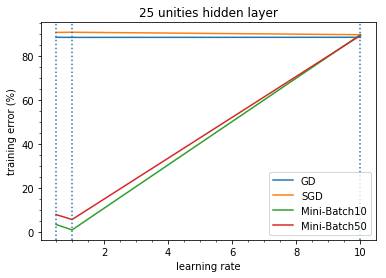

In [24]:
plt.plot(inputsGD, outputsGD, label='GD')
plt.plot(inputsSGD, outputsSGD, label='SGD')
plt.plot(inputsMiniBatch10, outputsMiniBatch10, label='Mini-Batch10')
plt.plot(inputsMiniBatch50, outputsMiniBatch50, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("25 unities hidden layer")
plt.legend()
plt.show()

In [25]:
# Limpar os arrays para testar outro features.
clear_arrays()

In [26]:
# GD, lr = 0.5, un = 50.
use_model(0.5, 50, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 173us/step - loss: 2.3046 - acc: 0.1024 - val_loss: 2.3006 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 0s 75us/step - loss: 2.3006 - acc: 0.1142 - val_loss: 2.2994 - val_acc: 0.1142
Epoch 3/10
5000/5000 [==============================] - 0s 77us/step - loss: 2.2994 - acc: 0.1142 - val_loss: 2.2984 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 0s 73us/step - loss: 2.2984 - acc: 0.1142 - val_loss: 2.2974 - val_acc: 0.1142
Epoch 5/10
5000/5000 [==============================] - 0s 73us/step - loss: 2.2974 - acc: 0.1142 - val_loss: 2.2963 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 0s 72us/step - loss: 2.2963 - acc: 0.1142 - val_loss: 2.2953 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 0s 76us/step - loss: 2.2953 - acc: 0.1142 - val_loss: 2.2942 - val_acc: 0.1142
Epoch 

In [27]:
# GD, lr = 1, un = 50.
use_model(1, 50, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 248us/step - loss: 2.3235 - acc: 0.0946 - val_loss: 2.3081 - val_acc: 0.1180
Epoch 2/10
5000/5000 [==============================] - 0s 79us/step - loss: 2.3081 - acc: 0.1180 - val_loss: 2.3001 - val_acc: 0.1846
Epoch 3/10
5000/5000 [==============================] - 0s 94us/step - loss: 2.3001 - acc: 0.1846 - val_loss: 2.2967 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 1s 112us/step - loss: 2.2967 - acc: 0.1142 - val_loss: 2.2943 - val_acc: 0.1158
Epoch 5/10
5000/5000 [==============================] - 1s 104us/step - loss: 2.2943 - acc: 0.1158 - val_loss: 2.2920 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 0s 94us/step - loss: 2.2920 - acc: 0.1142 - val_loss: 2.2897 - val_acc: 0.1144
Epoch 7/10
5000/5000 [==============================] - 0s 93us/step - loss: 2.2897 - acc: 0.1144 - val_loss: 2.2873 - val_acc: 0.1142
Epoc

In [28]:
# GD, lr = 1, un = 50.
use_model(10, 50, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 216us/step - loss: 2.3474 - acc: 0.1024 - val_loss: 6.2124 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 0s 89us/step - loss: 6.2124 - acc: 0.1142 - val_loss: 3.3721 - val_acc: 0.1000
Epoch 3/10
5000/5000 [==============================] - 0s 95us/step - loss: 3.3721 - acc: 0.1000 - val_loss: 3.0166 - val_acc: 0.1060
Epoch 4/10
5000/5000 [==============================] - 0s 82us/step - loss: 3.0166 - acc: 0.1060 - val_loss: 2.8718 - val_acc: 0.1060
Epoch 5/10
5000/5000 [==============================] - 0s 77us/step - loss: 2.8718 - acc: 0.1060 - val_loss: 2.7280 - val_acc: 0.1060
Epoch 6/10
5000/5000 [==============================] - 0s 80us/step - loss: 2.7280 - acc: 0.1060 - val_loss: 2.5871 - val_acc: 0.1060
Epoch 7/10
5000/5000 [==============================] - 1s 112us/step - loss: 2.5871 - acc: 0.1060 - val_loss: 2.4559 - val_acc: 0.1060
Epoch

In [29]:
# SGD, lr = 0.5, un = 50.
use_model(0.5, 50, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 47s 9ms/step - loss: 9.7415 - acc: 0.0976 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 2/10
5000/5000 [==============================] - 53s 11ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 3/10
5000/5000 [==============================] - 44s 9ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 4/10
5000/5000 [==============================] - 45s 9ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 5/10
5000/5000 [==============================] - 40s 8ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 6/10
5000/5000 [==============================] - 40s 8ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 7/10
5000/5000 [==============================] - 42s 8ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 

In [30]:
# SGD, lr = 1, un = 50.
use_model(1, 50, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 40s 8ms/step - loss: 4.1147 - acc: 0.0916 - val_loss: 5.1248 - val_acc: 0.0924
Epoch 2/10
5000/5000 [==============================] - 50s 10ms/step - loss: 6.1122 - acc: 0.1046 - val_loss: 6.4133 - val_acc: 0.1024
Epoch 3/10
5000/5000 [==============================] - 44s 9ms/step - loss: 6.3291 - acc: 0.0970 - val_loss: 6.2862 - val_acc: 0.1024
Epoch 4/10
5000/5000 [==============================] - 46s 9ms/step - loss: 6.3596 - acc: 0.0926 - val_loss: 6.1934 - val_acc: 0.1040
Epoch 5/10
5000/5000 [==============================] - 43s 9ms/step - loss: 5.6986 - acc: 0.0970 - val_loss: 5.6852 - val_acc: 0.1040
Epoch 6/10
5000/5000 [==============================] - 41s 8ms/step - loss: 5.4238 - acc: 0.0998 - val_loss: 5.4373 - val_acc: 0.0920
Epoch 7/10
5000/5000 [==============================] - 41s 8ms/step - loss: 5.3995 - acc: 0.1040 - val_loss: 5.2964 - val_acc: 0.0978
Epoch 

In [31]:
# SGD, lr = 10, un = 50.
use_model(10, 50, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 48s 10ms/step - loss: 14.4101 - acc: 0.1058 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 2/10
5000/5000 [==============================] - 45s 9ms/step - loss: 14.4096 - acc: 0.1060 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 3/10
5000/5000 [==============================] - 45s 9ms/step - loss: 14.4096 - acc: 0.1060 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 4/10
5000/5000 [==============================] - 44s 9ms/step - loss: 14.4096 - acc: 0.1060 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 5/10
5000/5000 [==============================] - 51s 10ms/step - loss: 14.4096 - acc: 0.1060 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 6/10
5000/5000 [==============================] - 51s 10ms/step - loss: 14.4096 - acc: 0.1060 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 7/10
5000/5000 [==============================] - 52s 10ms/step - loss: 14.4096 - acc: 0.1060 - val_loss: 14.4096 - val_a

In [32]:
# MB10, lr = 0.5, un = 50.
use_model(0.5, 50, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 8s 2ms/step - loss: 1.5766 - acc: 0.4144 - val_loss: 0.6406 - val_acc: 0.7984
Epoch 2/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.6088 - acc: 0.8008 - val_loss: 0.4264 - val_acc: 0.8620
Epoch 3/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4174 - acc: 0.8664 - val_loss: 0.3448 - val_acc: 0.8924
Epoch 4/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.3269 - acc: 0.8994 - val_loss: 0.2307 - val_acc: 0.9300
Epoch 5/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2679 - acc: 0.9150 - val_loss: 0.1908 - val_acc: 0.9400
Epoch 6/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2196 - acc: 0.9288 - val_loss: 0.1644 - val_acc: 0.9438
Epoch 7/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1780 - acc: 0.9446 - val_loss: 0.1280 - val_acc: 0.9628
Epoch 8/10
500

In [33]:
# MB10, lr = 1, un = 50.
use_model(1, 50, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 1.8189 - acc: 0.3198 - val_loss: 0.7787 - val_acc: 0.7280
Epoch 2/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.6366 - acc: 0.7922 - val_loss: 0.5541 - val_acc: 0.8152
Epoch 3/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4094 - acc: 0.8686 - val_loss: 0.2460 - val_acc: 0.9224
Epoch 4/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2869 - acc: 0.9054 - val_loss: 0.1995 - val_acc: 0.9364
Epoch 5/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2097 - acc: 0.9278 - val_loss: 0.1855 - val_acc: 0.9322
Epoch 6/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1608 - acc: 0.9474 - val_loss: 0.1170 - val_acc: 0.9620
Epoch 7/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1138 - acc: 0.9636 - val_loss: 0.0985 - val_acc: 0.9664
Epoch 8/10
500

In [34]:
# MB10, lr = 10, un = 50.
use_model(10, 50, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 8s 2ms/step - loss: 14.4915 - acc: 0.0996 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000


In [35]:
# MB50, lr = 0.5, un = 50.
use_model(0.5, 50, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 3s 523us/step - loss: 2.2162 - acc: 0.1732 - val_loss: 1.8662 - val_acc: 0.3484
Epoch 2/10
5000/5000 [==============================] - 2s 328us/step - loss: 1.3894 - acc: 0.5100 - val_loss: 1.0502 - val_acc: 0.6564
Epoch 3/10
5000/5000 [==============================] - 2s 339us/step - loss: 0.8180 - acc: 0.7204 - val_loss: 0.6320 - val_acc: 0.8008
Epoch 4/10
5000/5000 [==============================] - 2s 304us/step - loss: 0.6009 - acc: 0.8038 - val_loss: 0.5304 - val_acc: 0.8398
Epoch 5/10
5000/5000 [==============================] - 2s 308us/step - loss: 0.5017 - acc: 0.8424 - val_loss: 0.4486 - val_acc: 0.8640
Epoch 6/10
5000/5000 [==============================] - 2s 318us/step - loss: 0.4390 - acc: 0.8606 - val_loss: 0.3767 - val_acc: 0.8820
Epoch 7/10
5000/5000 [==============================] - 2s 313us/step - loss: 0.3915 - acc: 0.8804 - val_loss: 0.3463 - val_acc: 0.8902


In [36]:
# MB50, lr = 1, un = 50.
use_model(1, 50, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 478us/step - loss: 2.4851 - acc: 0.1492 - val_loss: 5.6882 - val_acc: 0.1024
Epoch 2/10
5000/5000 [==============================] - 2s 319us/step - loss: 3.0743 - acc: 0.3172 - val_loss: 1.4171 - val_acc: 0.5668
Epoch 3/10
5000/5000 [==============================] - 2s 323us/step - loss: 0.9737 - acc: 0.6544 - val_loss: 0.7412 - val_acc: 0.7286
Epoch 4/10
5000/5000 [==============================] - 2s 307us/step - loss: 0.6259 - acc: 0.7864 - val_loss: 0.5083 - val_acc: 0.8412
Epoch 5/10
5000/5000 [==============================] - 2s 332us/step - loss: 0.4794 - acc: 0.8468 - val_loss: 0.3739 - val_acc: 0.8858
Epoch 6/10
5000/5000 [==============================] - 2s 352us/step - loss: 0.3956 - acc: 0.8756 - val_loss: 0.2923 - val_acc: 0.9102
Epoch 7/10
5000/5000 [==============================] - 2s 319us/step - loss: 0.3326 - acc: 0.8972 - val_loss: 0.2989 - val_acc: 0.9082


In [37]:
# MB50, lr = 10, un = 50.
use_model(10, 50, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 3s 517us/step - loss: 2.5045 - acc: 0.0984 - val_loss: 2.3961 - val_acc: 0.0924
Epoch 2/10
5000/5000 [==============================] - 2s 303us/step - loss: 2.3967 - acc: 0.0984 - val_loss: 2.3321 - val_acc: 0.1142
Epoch 3/10
5000/5000 [==============================] - 1s 283us/step - loss: 2.4415 - acc: 0.1024 - val_loss: 2.5536 - val_acc: 0.1000
Epoch 4/10
5000/5000 [==============================] - 2s 455us/step - loss: 2.5432 - acc: 0.0996 - val_loss: 3.2815 - val_acc: 0.1000
Epoch 5/10
5000/5000 [==============================] - 2s 327us/step - loss: 3.4035 - acc: 0.1074 - val_loss: 2.9167 - val_acc: 0.1000
Epoch 6/10
5000/5000 [==============================] - 2s 311us/step - loss: 3.4533 - acc: 0.1012 - val_loss: 3.5753 - val_acc: 0.1000
Epoch 7/10
5000/5000 [==============================] - 2s 315us/step - loss: 3.2680 - acc: 0.1014 - val_loss: 3.0954 - val_acc: 0.1000


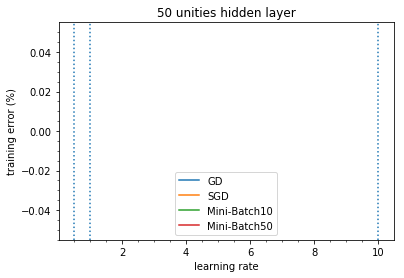

In [55]:
plt.plot(inputsGD, outputsGD, label='GD')
plt.plot(inputsSGD, outputsSGD, label='SGD')
plt.plot(inputsMiniBatch10, outputsMiniBatch10, label='Mini-Batch10')
plt.plot(inputsMiniBatch50, outputsMiniBatch50, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("50 unities hidden layer")
plt.legend()
plt.show()

In [39]:
# Limpar os arrays para testar outro features.
clear_arrays()

In [40]:
# GD, lr = 0.5, un = 100.
use_model(0.5, 100, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 331us/step - loss: 2.3589 - acc: 0.1000 - val_loss: 2.3117 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 0s 90us/step - loss: 2.3117 - acc: 0.1142 - val_loss: 2.2982 - val_acc: 0.1252
Epoch 3/10
5000/5000 [==============================] - 0s 85us/step - loss: 2.2982 - acc: 0.1252 - val_loss: 2.2946 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 1s 110us/step - loss: 2.2946 - acc: 0.1142 - val_loss: 2.2920 - val_acc: 0.1806
Epoch 5/10
5000/5000 [==============================] - 0s 90us/step - loss: 2.2920 - acc: 0.1806 - val_loss: 2.2897 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 0s 91us/step - loss: 2.2897 - acc: 0.1142 - val_loss: 2.2874 - val_acc: 0.1316
Epoch 7/10
5000/5000 [==============================] - 0s 98us/step - loss: 2.2874 - acc: 0.1316 - val_loss: 2.2852 - val_acc: 0.1148
Epoch

In [41]:
# GD, lr = 1, un = 100.
use_model(1, 100, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 285us/step - loss: 2.3346 - acc: 0.1000 - val_loss: 2.4275 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 0s 96us/step - loss: 2.4275 - acc: 0.1142 - val_loss: 2.6349 - val_acc: 0.1000
Epoch 3/10
5000/5000 [==============================] - 1s 105us/step - loss: 2.6349 - acc: 0.1000 - val_loss: 2.3930 - val_acc: 0.1000
Epoch 4/10
5000/5000 [==============================] - 0s 91us/step - loss: 2.3930 - acc: 0.1000 - val_loss: 2.2986 - val_acc: 0.1060
Epoch 5/10
5000/5000 [==============================] - 0s 89us/step - loss: 2.2986 - acc: 0.1060 - val_loss: 2.2833 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 0s 90us/step - loss: 2.2833 - acc: 0.1142 - val_loss: 2.2785 - val_acc: 0.1556
Epoch 7/10
5000/5000 [==============================] - 0s 86us/step - loss: 2.2785 - acc: 0.1556 - val_loss: 2.2742 - val_acc: 0.1146
Epoch

In [42]:
# GD, lr = 1, un = 100.
use_model(10, 100, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 273us/step - loss: 2.3317 - acc: 0.1060 - val_loss: 8.7535 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 0s 93us/step - loss: 8.7535 - acc: 0.1142 - val_loss: 4.2301 - val_acc: 0.1002
Epoch 3/10
5000/5000 [==============================] - 0s 88us/step - loss: 4.2301 - acc: 0.1002 - val_loss: 2.9617 - val_acc: 0.0978
Epoch 4/10
5000/5000 [==============================] - 0s 91us/step - loss: 2.9617 - acc: 0.0978 - val_loss: 2.7899 - val_acc: 0.1060
Epoch 5/10
5000/5000 [==============================] - 0s 92us/step - loss: 2.7899 - acc: 0.1060 - val_loss: 2.6467 - val_acc: 0.1060
Epoch 6/10
5000/5000 [==============================] - 1s 103us/step - loss: 2.6467 - acc: 0.1060 - val_loss: 2.5099 - val_acc: 0.1060
Epoch 7/10
5000/5000 [==============================] - 1s 131us/step - loss: 2.5099 - acc: 0.1060 - val_loss: 2.3915 - val_acc: 0.1060
Epoc

In [43]:
# SGD, lr = 0.5, un = 100.
use_model(0.5, 100, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 50s 10ms/step - loss: 14.5422 - acc: 0.0976 - val_loss: 14.5417 - val_acc: 0.0978
Epoch 2/10
5000/5000 [==============================] - 48s 10ms/step - loss: 14.5417 - acc: 0.0978 - val_loss: 14.5417 - val_acc: 0.0978
Epoch 3/10
5000/5000 [==============================] - 50s 10ms/step - loss: 14.5417 - acc: 0.0978 - val_loss: 14.5417 - val_acc: 0.0978
Epoch 4/10
5000/5000 [==============================] - 53s 11ms/step - loss: 14.5417 - acc: 0.0978 - val_loss: 14.5417 - val_acc: 0.0978
Epoch 5/10
5000/5000 [==============================] - 49s 10ms/step - loss: 14.5417 - acc: 0.0978 - val_loss: 14.5417 - val_acc: 0.0978
Epoch 6/10
5000/5000 [==============================] - 49s 10ms/step - loss: 14.5417 - acc: 0.0978 - val_loss: 14.5417 - val_acc: 0.0978
Epoch 7/10
5000/5000 [==============================] - 55s 11ms/step - loss: 14.5417 - acc: 0.0978 - val_loss: 14.5417 - va

In [44]:
# SGD, lr = 1, un = 100.
use_model(1, 100, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 53s 11ms/step - loss: 14.4680 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 2/10
5000/5000 [==============================] - 49s 10ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 3/10
5000/5000 [==============================] - 51s 10ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 4/10
5000/5000 [==============================] - 59s 12ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 5/10
5000/5000 [==============================] - 54s 11ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 6/10
5000/5000 [==============================] - 60s 12ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 7/10
5000/5000 [==============================] - 64s 13ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - va

In [45]:
# SGD, lr = 10, un = 100.
use_model(10, 100, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 63s 13ms/step - loss: 14.6357 - acc: 0.0918 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 2/10
5000/5000 [==============================] - 63s 13ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 3/10
5000/5000 [==============================] - 57s 11ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 4/10
5000/5000 [==============================] - 59s 12ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 5/10
5000/5000 [==============================] - 60s 12ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 6/10
5000/5000 [==============================] - 61s 12ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 7/10
5000/5000 [==============================] - 58s 12ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - va

In [46]:
# MB10, lr = 0.5, un = 100.
use_model(0.5, 100, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 8s 2ms/step - loss: 1.7863 - acc: 0.3456 - val_loss: 0.8039 - val_acc: 0.7000
Epoch 2/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.6753 - acc: 0.7714 - val_loss: 0.4691 - val_acc: 0.8548
Epoch 3/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4501 - acc: 0.8572 - val_loss: 0.4269 - val_acc: 0.8676
Epoch 4/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3444 - acc: 0.8930 - val_loss: 0.2783 - val_acc: 0.9134
Epoch 5/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2962 - acc: 0.9062 - val_loss: 0.2476 - val_acc: 0.9210
Epoch 6/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2528 - acc: 0.9186 - val_loss: 0.2271 - val_acc: 0.9292
Epoch 7/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2071 - acc: 0.9336 - val_loss: 0.1912 - val_acc: 0.9362
Epoch 8/10
500

In [47]:
# MB10, lr = 1, un = 100.
use_model(1, 100, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 8s 2ms/step - loss: 1.9650 - acc: 0.2654 - val_loss: 1.4659 - val_acc: 0.5230
Epoch 2/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.7669 - acc: 0.7410 - val_loss: 0.4798 - val_acc: 0.8460
Epoch 3/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4776 - acc: 0.8480 - val_loss: 0.3631 - val_acc: 0.8860
Epoch 4/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.3496 - acc: 0.8934 - val_loss: 0.2454 - val_acc: 0.9226
Epoch 5/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2702 - acc: 0.9166 - val_loss: 0.1949 - val_acc: 0.9402
Epoch 6/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2317 - acc: 0.9266 - val_loss: 0.1351 - val_acc: 0.9556
Epoch 7/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1725 - acc: 0.9456 - val_loss: 0.1120 - val_acc: 0.9664
Epoch 8/10
500

In [48]:
# MB10, lr = 10, un = 100.
use_model(10, 100, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 9s 2ms/step - loss: 14.6171 - acc: 0.0914 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 2/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 3/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 4/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 5/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 6/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 7/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920


In [49]:
# MB50, lr = 0.5, un = 100.
use_model(0.5, 100, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 4s 703us/step - loss: 2.1626 - acc: 0.2166 - val_loss: 1.8532 - val_acc: 0.4144
Epoch 2/10
5000/5000 [==============================] - 2s 345us/step - loss: 1.1703 - acc: 0.5868 - val_loss: 0.8612 - val_acc: 0.6762
Epoch 3/10
5000/5000 [==============================] - 2s 402us/step - loss: 0.7171 - acc: 0.7576 - val_loss: 0.6411 - val_acc: 0.8050
Epoch 4/10
5000/5000 [==============================] - 2s 354us/step - loss: 0.5372 - acc: 0.8194 - val_loss: 0.4535 - val_acc: 0.8530
Epoch 5/10
5000/5000 [==============================] - 2s 374us/step - loss: 0.4691 - acc: 0.8486 - val_loss: 0.3964 - val_acc: 0.8724
Epoch 6/10
5000/5000 [==============================] - 2s 336us/step - loss: 0.4197 - acc: 0.8662 - val_loss: 0.3756 - val_acc: 0.8856
Epoch 7/10
5000/5000 [==============================] - 2s 351us/step - loss: 0.3703 - acc: 0.8820 - val_loss: 0.3165 - val_acc: 0.8996


In [50]:
# MB50, lr = 1, un = 100.
use_model(1, 100, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 3s 625us/step - loss: 2.2400 - acc: 0.1648 - val_loss: 2.1532 - val_acc: 0.1644
Epoch 2/10
5000/5000 [==============================] - 2s 346us/step - loss: 1.3550 - acc: 0.4942 - val_loss: 0.8920 - val_acc: 0.6598
Epoch 3/10
5000/5000 [==============================] - 2s 364us/step - loss: 0.7122 - acc: 0.7494 - val_loss: 0.5111 - val_acc: 0.8366
Epoch 4/10
5000/5000 [==============================] - 2s 365us/step - loss: 0.5213 - acc: 0.8298 - val_loss: 0.4063 - val_acc: 0.8720
Epoch 5/10
5000/5000 [==============================] - 2s 356us/step - loss: 0.4021 - acc: 0.8740 - val_loss: 0.5217 - val_acc: 0.8170
Epoch 6/10
5000/5000 [==============================] - 2s 372us/step - loss: 0.3393 - acc: 0.8904 - val_loss: 0.2861 - val_acc: 0.9100
Epoch 7/10
5000/5000 [==============================] - 2s 364us/step - loss: 0.2951 - acc: 0.9054 - val_loss: 0.2410 - val_acc: 0.9262


In [51]:
# MB50, lr = 10, un = 100.
use_model(10, 100, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 3s 660us/step - loss: 14.3877 - acc: 0.0992 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
5000/5000 [==============================] - 2s 365us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
5000/5000 [==============================] - 2s 355us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
5000/5000 [==============================] - 2s 343us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
5000/5000 [==============================] - 2s 359us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
5000/5000 [==============================] - 2s 359us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
5000/5000 [==============================] - 2s 353us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - va

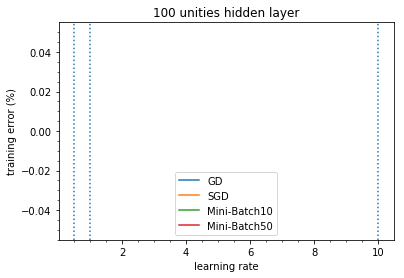

In [54]:
plt.plot(inputsGD, outputsGD, label='GD')
plt.plot(inputsSGD, outputsSGD, label='SGD')
plt.plot(inputsMiniBatch10, outputsMiniBatch10, label='Mini-Batch10')
plt.plot(inputsMiniBatch50, outputsMiniBatch50, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("100 unities hidden layer")
plt.legend()
plt.show()

In [53]:
# Limpar os arrays para testar outro features.
clear_arrays()

# Discussão dos Resultados

Primeiramente, vimos dos três gráficos moestrados acima que